In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/alma_better/capstone_project/face_emotion_recognition")

In [ ]:
!wget https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip

--2022-05-25 15:29:20--  https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/si11cws2pyho1bp/archive.zip [following]
--2022-05-25 15:29:20--  https://www.dropbox.com/s/raw/si11cws2pyho1bp/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0b5c843b653df33a26f527df36.dl.dropboxusercontent.com/cd/0/inline/Bl-eV-IjSeSo6mXCAlynknmxk_ZrSPKr0YNjyW8n4YgmHU-GVhJpBroEYoqKa7Zppr0DbBx6nQueXzpi-ylJX1UktCZmE7JdjMn9q81sMiL_wAmjfR6NyOkn0mfY-vWND9uH-73FNUWomEL9v6HGSfddFTGmknlzHUZY5BkUG-KogA/file# [following]
--2022-05-25 15:29:20--  https://uc0b5c843b653df33a26f527df36.dl.dropboxusercontent.com/cd/0/inline/Bl-eV-IjSeSo6mXCAlynknmxk_ZrSPKr0YNjyW8n4YgmHU-GVhJpBroEYoqKa7Zppr0DbBx

In [ ]:
!unzip -q "/content/drive/MyDrive/alma_better/capstone_project/face_emotion_recognition/archive.zip"

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
train_dir = "/content/drive/MyDrive/alma_better/capstone_project/face_emotion_recognition/train" #passing the path with training images
test_dir = "/content/drive/MyDrive/alma_better/capstone_project/face_emotion_recognition/test"   #passing the path with testing images

In [ ]:
img_size = 48 #original size of the image

In [ ]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 60
batch_size = 64

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 63s 141ms/step - loss: 9.3216 - accuracy: 0.1927 - val_loss: 8.7518 - val_accuracy: 0.2451
Epoch 2/60
359/359 [==============================] - 46s 127ms/step - loss: 8.3061 - accuracy: 0.2294 - val_loss: 7.8103 - val_accuracy: 0.2598
Epoch 3/60
359/359 [==============================] - 48s 134ms/step - loss: 7.3405 - accuracy: 0.2587 - val_loss: 6.6799 - val_accuracy: 0.3191
Epoch 4/60
359/359 [==============================] - 45s 126ms/step - loss: 6.3987 - accuracy: 0.2931 - val_loss: 5.8288 - val_accuracy: 0.3380
Epoch 5/60
359/359 [==============================] - 45s 126ms/step - loss: 5.5217 - accuracy: 0.3308 - val_loss: 5.0469 - val_accuracy: 0.3673
Epoch 6/60
359/359 [==============================] - 45s 127ms/step - loss: 4.7801 - accuracy: 0.3529 - val_loss: 4.5566 - val_accuracy: 0.3184
Epoch 7/60
359/359 [==============================] - 45s 126ms/step - loss: 4.1506 - accuracy: 0.3784 - val_loss: 3.7921 - val_ac

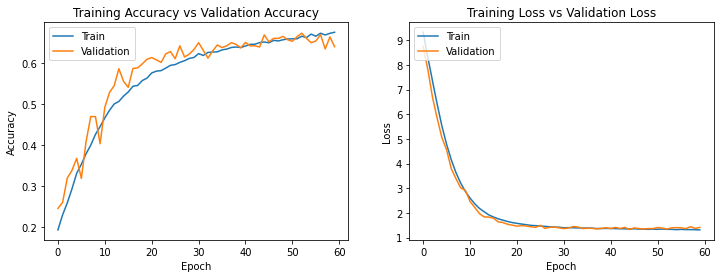

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('model_optimal.h5')